<a href="https://colab.research.google.com/github/pk38/DimensionalBiasDetection/blob/dev/AlgorithmImplementationFull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Libraries

In [66]:
import collections
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np
import math
import seaborn as sns

### Load Dataset

Mount on the correct folder here (only for google colab)

In [17]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/Shared drives/CSE293ResearchProject/ml-latest-small/
all_data = pd.read_csv('all_data.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/Shared drives/CSE293ResearchProject/ml-latest-small


### Data Pre-processing

#### Converting string (Genre, Director and Cast) to suitable lists

In [18]:
def str_to_list(s):
    return ast.literal_eval(s)

# apply function to 'Directors' column
all_data['Directors'] = all_data['Directors'].apply(str_to_list)
# apply function to 'Cast' column
all_data['Cast'] = all_data['Cast'].apply(str_to_list)
# apply function to 'genres' column
all_data['genres'] = all_data['genres'].apply(str_to_list)
all_data

,userId,movieId,rating,timestamp,title,genres,Directors,Cast
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
2,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
3,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
4,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
...,...,...,...,...,...,...,...,...
201641,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",[Sion Sono],"[Joe Odagiri, Jai West, Motoki Fukami, Hiroyuk..."
201642,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201643,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201644,610,163981,3.5,1493850155,31 (2016),[Horror],[Rob Zombie],"[Sheri Moon Zombie, Jeff Daniel Phillips, Lawr..."


Removing Nan or empty values

In [19]:
# Replace empty lists with NaN values
all_data = all_data.replace(to_replace=[], value=np.nan)

# Remove rows with NaN values
all_data = all_data.dropna()
all_data

,userId,movieId,rating,timestamp,title,genres,Directors,Cast
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
2,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
3,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
4,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
...,...,...,...,...,...,...,...,...
201641,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",[Sion Sono],"[Joe Odagiri, Jai West, Motoki Fukami, Hiroyuk..."
201642,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201643,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201644,610,163981,3.5,1493850155,31 (2016),[Horror],[Rob Zombie],"[Sheri Moon Zombie, Jeff Daniel Phillips, Lawr..."


In [20]:
all_data.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
Directors     object
Cast          object
dtype: object

### Dimensional Analysis on one *dimension*

#### Get the user with most movies watched 

In [58]:
# group by userId and count the number of unique movieIds
movies_watched = all_data.groupby('userId')['movieId'].nunique()

# find the user with the most watched movies
user_most_watched = movies_watched.idxmax()

print(f"User with ID {user_most_watched} has watched the most movies, with {movies_watched[user_most_watched]} unique movies watched.")

User with ID 414 has watched the most movies, with 2698 unique movies watched.


#### For one dimension, try to extract the subdimensional feature biases per **user**

In [57]:
# define the dimensions to consider
dimensions = ['genres', 'Cast', 'Directors']

# Create a new dataframe to store the subdimensional biases
result_sub_dimension = []

# Iterate over each user
for user_id in all_data['userId'].unique():
    user_data = all_data[all_data['userId'] == user_id]
    user_result = {'userId' : user_id}
    for dim in dimensions:
      # explode on one dimension
      explode_data = user_data.explode(dim)
      explode_data = explode_data[explode_data[dim].apply(lambda x: not isinstance(x, list))]
      # Prune the least-watched genres, directors, and cast members
      sub_dim_val_counts = explode_data[dim].value_counts()
      # keep 1/2 of the most watched dims only to avoid calcuation mistakes (as in getting the lowest watched counts and ratings)
      top_sub_dims = sub_dim_val_counts.nlargest(int(len(sub_dim_val_counts)*(1/2))).index.tolist()
      explode_data_pruned = explode_data.loc[explode_data[dim].isin(top_sub_dims)]
      total_movies_watched_by_user = explode_data_pruned['movieId'].nunique()

      # Calculate the watch bias for genres
      grouped_data = explode_data_pruned.groupby(dim)['rating']
      dim_watch_bias = grouped_data.count().sort_values(ascending=False)
      dim_watch_bias = [(sub_dim, count/total_movies_watched_by_user) for sub_dim, count in dim_watch_bias.iteritems()]
      
      # Calculate the rate bias for genres
      dim_rate_bias = grouped_data.mean().sort_values(ascending=False)
      dim_rate_bias = [(sub_dim, score) for sub_dim, score in dim_rate_bias.iteritems()]
      user_result['sub'+dim+'WatchBias'] = dim_watch_bias
      user_result['sub'+dim+'RateBias'] = dim_rate_bias

    # append the user_result dictionary to the result_list
    result_sub_dimension.append(user_result)

print("done")
# create a dataframe from the result_list
result_sub_dimension_df = pd.DataFrame(result_sub_dimension)
result_sub_dimension_df
    

done


,userId,subgenresWatchBias,subgenresRateBias,subCastWatchBias,subCastRateBias,subDirectorsWatchBias,subDirectorsRateBias
0,1,"[(Action, 0.7929515418502202), (Adventure, 0.7...","[(Children, 4.5476190476190474), (Drama, 4.529...","[(Alan Harris, 0.08658008658008658), (Harrison...","[(Jordan Marder, 5.0), (Roy Hall, 5.0), (Hugh ...","[(Steven Spielberg, 0.1), (Wolfgang Reitherman...","[(Lilly Wachowski, 5.0), (Penelope Spheeris, 5..."
1,5,"[(Drama, 1.1363636363636365), (Comedy, 0.68181...","[(Children, 4.111111111111111), (Crime, 3.8333...","[(Frank Welker, 0.1951219512195122), (Phil Pro...","[(Mere Boynton, 5.0), (Robby Benson, 5.0), (Jo...","[(Barry Sonnenfeld, 0.16), (Ben Sharpsteen, 0....","[(Larry Morey, 5.0), (William Cottrell, 5.0), ..."
2,7,"[(Action, 0.8421052631578947), (Drama, 0.75), ...","[(Thriller, 3.4302325581395348), (Adventure, 3...","[(Arnold Montey, 0.16), (Jimmy Star, 0.1333333...","[(Tetsurô Ishibashi, 5.0), (Gerald Ford, 5.0),...","[(Steven Spielberg, 0.0970873786407767), (M. N...","[(Clint Eastwood, 4.5), (Edward Zwick, 4.5), (..."
3,15,"[(Action, 0.8740740740740741), (Sci-Fi, 0.8740...","[(Drama, 3.740740740740741), (Sci-Fi, 3.584745...","[(Arnold Montey, 0.19402985074626866), (John R...","[(A'da Alison Woolfolk, 5.0), (Jason Cutts, 5....","[(Steven Spielberg, 0.15217391304347827), (Chr...","[(Alejandro Amenábar, 5.0), (Dan Trachtenberg,..."
4,17,"[(Drama, 0.9902912621359223), (Action, 0.75728...","[(Sci-Fi, 4.4), (Fantasy, 4.323529411764706), ...","[(Arnold Montey, 0.19047619047619047), (Frank ...","[(Suzanne Pleshette, 5.0), (Greg Tozer, 5.0), ...","[(Hayao Miyazaki, 0.14285714285714285), (Steve...","[(Francis Ford Coppola, 4.75), (Robert Zemecki..."
...,...,...,...,...,...,...,...
605,506,"[(Drama, 1.2380952380952381), (Romance, 0.9523...","[(Sci-Fi, 4.166666666666667), (Crime, 3.5), (R...","[(James Fiddy, 0.34146341463414637), (Arnold M...","[(June Diane Raphael, 5.0), (Lina Leandersson,...","[(David Fincher, 0.18181818181818182), (Joe Wr...","[(Tomas Alfredson, 5.0), (Christopher Nolan, 5..."
606,397,"[(Comedy, 1.0434782608695652), (Drama, 1.04347...","[(Romance, 4.666666666666667), (Drama, 4.25), ...","[(Woody Allen, 0.6), (John Doumanian, 0.5), (D...","[(Zhiming Huang, 5.0), (Takeshi Kaneshiro, 5.0...","[(Woody Allen, 0.8571428571428571), (Akira Kur...","[(Woody Allen, 4.583333333333333), (Ang Lee, 4..."
607,556,"[(Adventure, 1.625), (Fantasy, 1.625), (Action...","[(Children, 4.416666666666667), (Adventure, 4....","[(Alan Rickman, 0.5), (Maggie Smith, 0.4375), ...","[(Kristen Wiig, 5.0), (Robin Atkin Downes, 5.0...","[(Peter Jackson, 0.36363636363636365), (Chris ...","[(Dean DeBlois, 5.0), (Stefen Fangmeier, 4.5),..."
608,175,"[(Drama, 1.3636363636363635), (Comedy, 0.81818...","[(Romance, 4.277777777777778), (Drama, 4.03333...","[(Joan Cusack, 0.2222222222222222), (Raquel Ya...","[(Zoia Petrossian, 5.0), (Emily Peachey, 5.0),...","[(Anne Fletcher, 0.3076923076923077), (Agniesz...","[(Sean McNamara, 5.0), (Tim Fywell, 5.0), (Ann..."


#### Result visualisations for subdimensional bias

##### Genre HeatMap
This heatmap will help us identify the most popular genres among users and whether users tend to watch or rate movies more positively if they belong to certain genres.

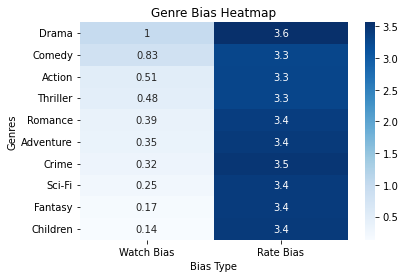

In [116]:
# Create empty dictionaries for watch bias and rate bias
dim_wb_dict = {}
dim_rb_dict = {}
# for user with most watched movies
user_Id = 414
user_data = result_sub_dimension_df[result_sub_dimension_df['userId'] == user_Id]

# Extract the director watch bias and rate bias lists
dim_wb_list = user_data['subgenresWatchBias']
dim_rb_list = user_data['subgenresRateBias']
# Iterate over each tuple in the director watch bias list
for dim_wb in dim_wb_list.iloc[0]:
  sub_dim = dim_wb[0]
  wb_score = dim_wb[1]
  # If the director is not already in the dictionary, create a new entry
  if sub_dim not in dim_wb_dict:
    dim_wb_dict[sub_dim] = []
  # Add the watch bias score to the director's list
  dim_wb_dict[sub_dim].append(wb_score)

# Iterate over each tuple in the director rate bias list
for dim_rb in dim_rb_list.iloc[0]:
  sub_dim = dim_rb[0]
  rb_score = dim_rb[1]

  # If the director is not already in the dictionary, create a new entry
  if sub_dim not in dim_rb_dict:
      dim_rb_dict[sub_dim] = []
  
  # Add the rate bias score to the director's list
  dim_rb_dict[sub_dim].append(rb_score)

# Create DataFrames from the director watch bias and rate bias dictionaries
dim_wb_df = pd.DataFrame.from_dict(dim_wb_dict, orient='index')
dim_rb_df = pd.DataFrame.from_dict(dim_rb_dict, orient='index')

# Create the heatmap data by concatenating the two DataFrames
heatmap_data = pd.concat([dim_wb_df, dim_rb_df], axis=1)

# Set the column names and plot the heatmap
heatmap_data.columns = ['Watch Bias', 'Rate Bias']
sns.heatmap(heatmap_data, cmap='Blues', annot=True)
plt.xlabel('Bias Type')
plt.ylabel('Genres')
plt.title('Genre Bias Heatmap')
plt.show()


##### Subgenre Bias Violin Plot
The shape of the violin shows the distribution of the bias scores, with wider sections indicating higher density of scores. This plot will help us identify any variations in the distribution of watch and rating biases across different subgenres for each user.



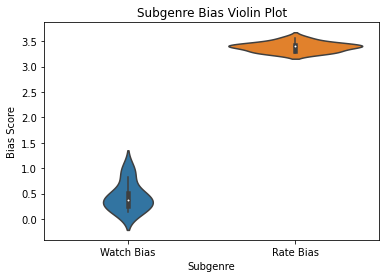

In [117]:
fig, ax = plt.subplots()
sns.violinplot(data=heatmap_data, ax=ax)
ax.set_xlabel('Subgenre')
ax.set_ylabel('Bias Score')
ax.set_title('Subgenre Bias Violin Plot')
plt.show()

##### Bar chart of Watch biases

<ipython-input-130-71a40da4e798>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(genres, rotation=30)
<ipython-input-130-71a40da4e798>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(cast[:10], rotation=30)
<ipython-input-130-71a40da4e798>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(directors[:10], rotation=30)


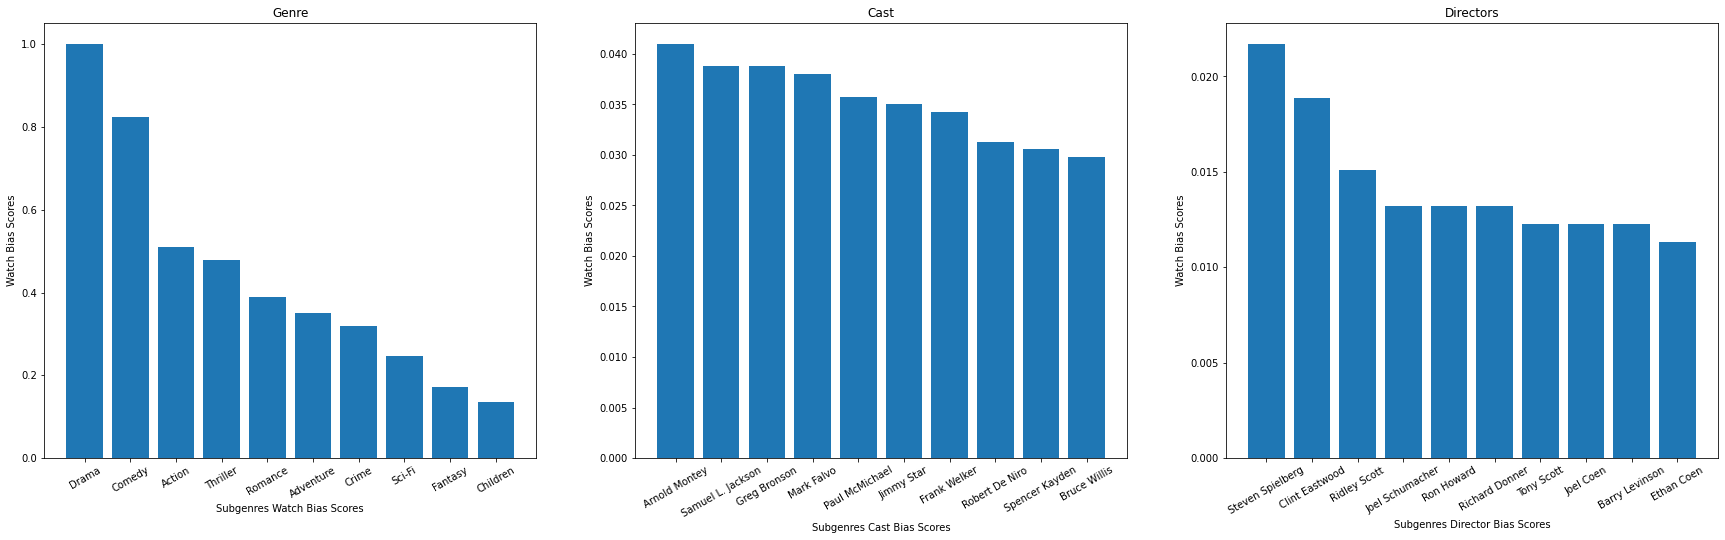

In [130]:
# create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 8))

# plot genresWatchBias
subgenresWatchBias = user_data['subgenresWatchBias'].iloc[0]
genres = [genre[0] for genre in subgenresWatchBias]
biases = [bias[1] for bias in subgenresWatchBias]
axs[0].bar(genres, biases)
axs[0].set_title('Genre')
axs[0].set_xticklabels(genres, rotation=30)
axs[0].set_xlabel('Subgenres Watch Bias Scores')
axs[0].set_ylabel('Watch Bias Scores')

# plot castWatchBias
subCastWatchBias = user_data['subCastWatchBias'].iloc[0]
cast = [actor[0] for actor in subCastWatchBias]
biases = [bias[1] for bias in subCastWatchBias]
axs[1].bar(cast[:10], biases[:10])
axs[1].set_title('Cast')
axs[1].set_xticklabels(cast[:10], rotation=30)
axs[1].set_xlabel('Subgenres Cast Bias Scores')
axs[1].set_ylabel('Watch Bias Scores')


# plot directorWatchBias
subDirectorsWatchBias = user_data['subDirectorsWatchBias'].iloc[0]
directors = [director[0] for director in subDirectorsWatchBias]
biases = [bias[1] for bias in subDirectorsWatchBias]
axs[2].bar(directors[:10], biases[:10])
axs[2].set_title('Directors')
axs[2].set_xticklabels(directors[:10], rotation=30)
axs[2].set_xlabel('Subgenres Director Bias Scores')
axs[2].set_ylabel('Watch Bias Scores')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.9)

# show the plot
plt.show()

##### Bar chart of Rate biases

<ipython-input-131-d97380cbcb47>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(genres, rotation=30)
<ipython-input-131-d97380cbcb47>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(cast[:10], rotation=30)
<ipython-input-131-d97380cbcb47>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(directors[:10], rotation=30)


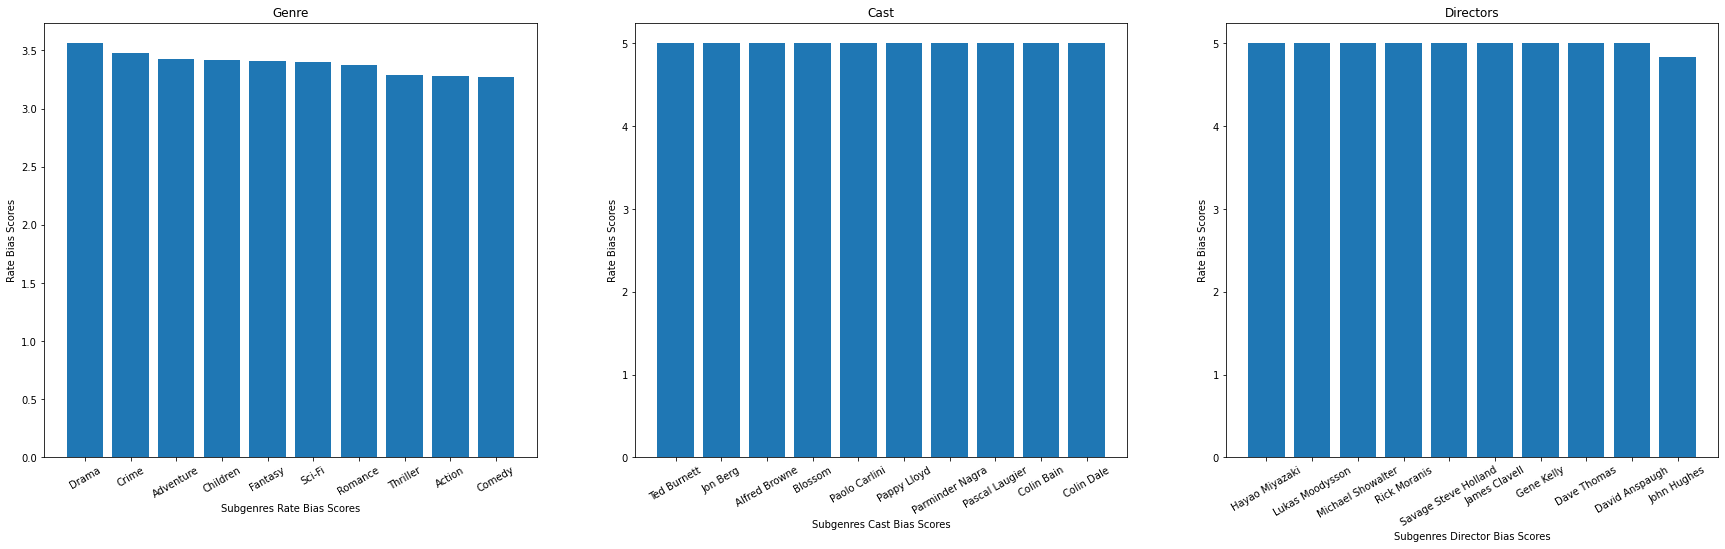

In [131]:
# create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 8))

# plot genresRateBias
subgenresRateBias = user_data['subgenresRateBias'].iloc[0]
genres = [genre[0] for genre in subgenresRateBias]
biases = [bias[1] for bias in subgenresRateBias]
axs[0].bar(genres, biases)
axs[0].set_title('Genre')
axs[0].set_xticklabels(genres, rotation=30)
axs[0].set_xlabel('Subgenres Rate Bias Scores')
axs[0].set_ylabel('Rate Bias Scores')

# plot castRateBias
subCastRateBias = user_data['subCastRateBias'].iloc[0]
cast = [actor[0] for actor in subCastRateBias]
biases = [bias[1] for bias in subCastRateBias]
axs[1].bar(cast[:10], biases[:10])
axs[1].set_title('Cast')
axs[1].set_xticklabels(cast[:10], rotation=30)
axs[1].set_xlabel('Subgenres Cast Bias Scores')
axs[1].set_ylabel('Rate Bias Scores')


# plot directorRateBias
subDirectorsRateBias = user_data['subDirectorsRateBias'].iloc[0]
directors = [director[0] for director in subDirectorsRateBias]
biases = [bias[1] for bias in subDirectorsRateBias]
axs[2].bar(directors[:10], biases[:10])
axs[2].set_title('Directors')
axs[2].set_xticklabels(directors[:10], rotation=30)
axs[2].set_xlabel('Subgenres Director Bias Scores')
axs[2].set_ylabel('Rate Bias Scores')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.9)

# show the plot
plt.show()

### Dimensional Analysis on all *dimensions*
Main Algorithm (explained in text)

For dimensional bias

In [21]:
# define the dimensions to consider
dimensions = ['genres', 'Cast', 'Directors']

# initialize an empty list to store the result for each user
result_list = []

# iterate over each user in the dataframe
for user in all_data['userId'].unique():
    # create a new dictionary to store the results for this user
    user_result = {'userId': user}
    data_current_user = all_data[all_data['userId']==user]
    total_movies_watched_by_user = data_current_user['movieId'].nunique()
    # to store the ovreall bias score for all dimensions
    watch_bias_score = {}
    rate_bias_score = {}
    # iterate over each dimension
    for dim in dimensions:
        # explode the dimension column to get the sub-dimensions
        explode_all_data = data_current_user.explode(dim)
        # this step is to remove the lists if present(empty) and only keep strings
        explode_all_data = explode_all_data[explode_all_data[dim].apply(lambda x: not isinstance(x, list))]
        subdims = explode_all_data[dim] #.apply(lambda x: str(x) if type(x) == list else x)
        # count the number of movies watched by this user in each sub-dimension
        subdim_counts = subdims.value_counts()
        unique_dim_count = subdim_counts.count()
        # Calculate mean and standard deviation
        subdim_mean = subdim_counts.mean()
        subdim_std = subdim_counts.std()
        # normalize the scores using z-score normalization
        subdim_scores = subdim_counts / total_movies_watched_by_user
        subdim_zscores = (subdim_scores - subdim_mean) / subdim_std
        dim_score = subdim_zscores.sum() / unique_dim_count
        watch_bias_score[dim] = dim_score
        # calculate the score for each sub-dimension as the fraction of movies watched in this sub-dimension
        # store the most watched sub-dimension and its score
        most_watched_subdim = subdim_zscores.idxmax()
        most_watched_score = subdim_zscores.max()
        
        # group the dataframe by sub-dimension and calculate the average rating for each sub-dimension
        grouped_rating = explode_all_data.groupby(dim)['rating']
        subdim_ratings = grouped_rating.mean()
        subdim_ratings_std = grouped_rating.std(ddof=0)
        subdim_ratings_mean = subdim_ratings.mean()
        # Calculate the weighted z-score for each sub-dimension based on their rating and the overall rating bias
        subdim_zscores_rating = (subdim_ratings - subdim_ratings_mean) / subdim_ratings_std

        # to take care of dimensions with very less ratings, we will just substitute neg inf
        subdim_zscores_rating.replace([np.inf, np.nan], -np.inf, inplace=True)
        # find the sub-dimension with the highest average rating
        most_rated_subdim = subdim_zscores_rating.idxmax()
        most_rated_score = subdim_zscores_rating.max()
        # Ignore -np.inf values while calculating mean
        valid_values = subdim_zscores_rating[subdim_zscores_rating != -np.inf]
        if len(valid_values) > 0:
            mean_rating_bias_score = valid_values.mean()
        else:
            mean_rating_bias_score = -np.inf
        rate_bias_score[dim] = mean_rating_bias_score
        # store the results for this dimension in the user_result dictionary
        user_result[dim+'WatchBias'] = (most_watched_subdim, most_watched_score)
        user_result[dim+'RateBias'] = (most_rated_subdim, most_rated_score)
    
    # calculate the watch_bias_dimension as the dimension with the watch_bias_score
    # calculate the rate_bias_dimension as the dimension with the rate_bias_score
    watch_bias_dimension, rate_bias_dimension = '', ''
    watch_bias_dimension_score, rate_bias_dimension_score = -np.inf, -np.inf
    for dim in dimensions:
      if watch_bias_dimension_score < watch_bias_score[dim]:
        watch_bias_dimension_score = watch_bias_score[dim]
        watch_bias_dimension = dim
      if rate_bias_dimension_score < rate_bias_score[dim]:
        rate_bias_dimension_score = rate_bias_score[dim]
        rate_bias_dimension = dim
    
    # add the watch_bias_dimension and rate_bias_dimension to the user_result dictionary
    user_result['watch_bias_dimension'] = (watch_bias_dimension, watch_bias_dimension_score)
    user_result['rate_bias_dimension'] = (rate_bias_dimension, rate_bias_dimension_score)
    
    # append the user_result dictionary to the result_list
    result_list.append(user_result)

print("done")
# create a dataframe from the result_list
result_df = pd.DataFrame(result_list)
result_df

done


,userId,genresWatchBias,genresRateBias,CastWatchBias,CastRateBias,DirectorsWatchBias,DirectorsRateBias,watch_bias_dimension,rate_bias_dimension
0,1,"(Action, -1.48096977359177)","(Animation, 0.5486621604824086)","(Alan Harris, -1.9032374876330433)","(Carrie Fisher, 1.2754237365429224)","(Steven Spielberg, -1.3453216360085485)","(Wolfgang Reitherman, 1.0272699567541077)","(Directors, -1.3721543300275982)","(genres, -0.00707383961409757)"
1,5,"(Drama, -1.1403472797050604)","(Musical, 1.044494312876666)","(Phil Proctor, -3.810565673112505)","(Bill Farmer, 1.8092275790565062)","(Barry Sonnenfeld, -3.9480264800167046)","(Barry Sonnenfeld, -0.8214285714285713)","(genres, -1.205391094199472)","(genres, 0.01157923410235214)"
2,7,"(Action, -1.2643850813451618)","(Horror, 0.6642904019655587)","(Arnold Montey, -1.943861096162386)","(Geoffrey Blake, 6.545088776923144)","(Steven Spielberg, -1.6363359861434046)","(Peter Jackson, 4.761760543551356)","(genres, -1.2766089064501598)","(Directors, 0.5365168486460671)"
3,15,"(Sci-Fi, -1.2719101596407132)","(War, 0.969471979813078)","(Arnold Montey, -2.052951028029887)","(Jorge Leon, 5.980639470767648)","(Steven Spielberg, -1.3792119932821492)","(Clint Eastwood, 2.092364532019704)","(genres, -1.28392474978629)","(genres, -0.02357733893441817)"
4,17,"(Drama, -1.0734309556278956)","(War, 1.0147801534082834)","(Arnold Montey, -2.3255113156725686)","(James Earl Jones, 2.951453232916117)","(Steven Spielberg, -1.503262524499603)","(Francis Ford Coppola, 2.4126582278481026)","(genres, -1.0964942358286178)","(Directors, 0.793874079064204)"
...,...,...,...,...,...,...,...,...,...
605,506,"(Drama, -0.6621457030777556)","(Horror, 2.5929962013295342)","(James Fiddy, -3.1821262061770788)","(Jason Bateman, 2.9941755483849932)","(Joe Wright, -4.590698142644403)","(Joe Wright, 0.4390243902439029)","(genres, -0.7265356005418617)","(genres, 0.20802254087239366)"
606,397,"(Comedy, -0.9547131775346909)","(Romance, 2.1881522351247944)","(Woody Allen, -3.0700653239194415)","(Ira Wheeler, 3.4168597168597166)","(Woody Allen, -0.8847051563151341)","(Woody Allen, 1.9033772163147804)","(genres, -1.0329683560211411)","(Directors, 1.9033772163147804)"
607,556,"(Adventure, -0.8716124024743216)","(Musical, 0.7401527044384187)","(Alan Rickman, -1.2622059908676098)","(Adam Alderman, 2.6410982658959568)","(Peter Jackson, -1.4668918865593275)","(Chris Columbus, 0.3034528684213979)","(genres, -0.9398255470157902)","(Cast, 0.39363119688950504)"
608,175,"(Drama, -0.9834661502078509)","(Romance, 2.632748574554391)","(Nicole Catrice Keller, -6.7326247841189035)","(Hilary Duff, 3.1386310904872405)","(Anne Fletcher, -4.694855340334425)","(Anne Fletcher, 1.8749999999999996)","(genres, -1.0633202393272918)","(Directors, 1.8749999999999996)"


In [31]:
# save the result dataframe to a CSV file
result_df.to_csv('result.csv', index=False)

####Get user with most movies watched for genre feature bias analysis

#### Result Visualisations

##### Visualisation of most watched dimensions on highest watched subdimension

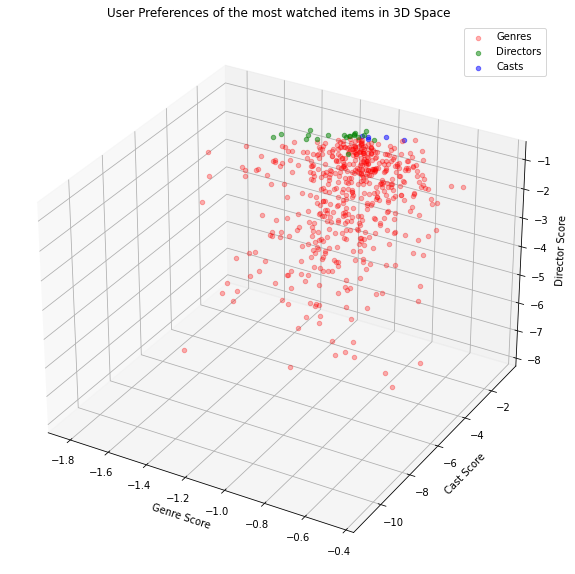

In [52]:
from mpl_toolkits.mplot3d import Axes3D

# create a 3D scatter plot for genres, cast, and directors
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# red_plot = ax.scatter([], [], [], color='red', marker='o', alpha = 0.3, label='Genres')
# blue_plot = ax.scatter([], [], [], color='blue', marker='o', alpha = 0.5, label='Cast')
# green_plot = ax.scatter([], [], [], color='green', marker='o', alpha = 0.5, label='Directors')
# loop over each row in the result dataframe
for index, row in result_df.iterrows():
    genre_score = row['genresWatchBias'][1]
    cast_score = row['CastWatchBias'][1]
    director_score = row['DirectorsWatchBias'][1]
    # watch_bias_score = row['watch_bias_dimension'][1]
    # rate_bias_score = row['rate_bias_dimension'][1]
    if not (math.isinf(genre_score)) and \
   not (math.isinf(cast_score)) and \
   not (math.isinf(director_score)) and \
   not (math.isinf(watch_bias_score)) and \
   not (math.isinf(rate_bias_score)):

      # plot the point
      if row['watch_bias_dimension'][0] == 'genres':
          genre_plot = ax.scatter(genre_score, cast_score, director_score, color='red', marker='o', alpha = 0.3)
      elif row['watch_bias_dimension'][0] == 'Cast':
          cast_plot = ax.scatter(genre_score, cast_score, director_score, color='blue', marker='o', alpha = 0.5)
      else:
          dir_plot = ax.scatter(genre_score, cast_score, director_score, color='green', marker='o', alpha = 0.5)
      
      # annotate the point with the user ID
      # ax.text(genre_score, cast_score, director_score, row['userId'], color='black')
    
# set the labels and title
ax.set_xlabel('Genre Score')
ax.set_ylabel('Cast Score')
ax.set_zlabel('Director Score')
ax.set_title('User Preferences of the most watched items in 3D Space')

# add the legend
ax.legend(handles = [genre_plot, dir_plot, cast_plot], labels=['Genres', 'Directors', 'Casts'])

plt.show()


##### Visualisation of most rated dimensions on highest rated subdimension

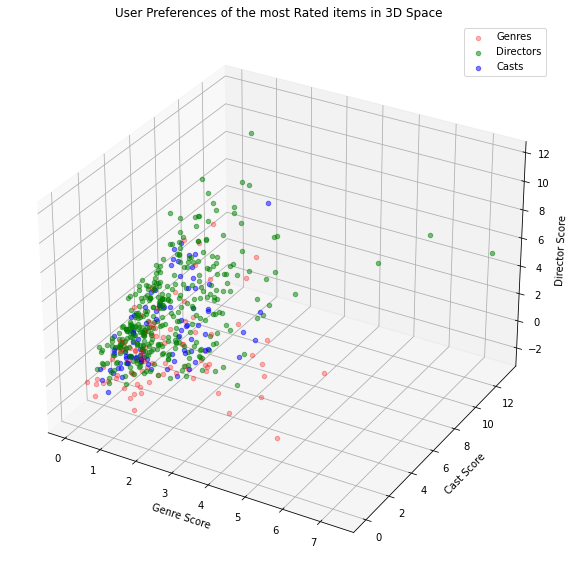

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# create a 3D scatter plot for genres, cast, and directors
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# red_plot = ax.scatter([], [], [], color='red', marker='o', alpha = 0.3, label='Genres')
# blue_plot = ax.scatter([], [], [], color='blue', marker='o', alpha = 0.5, label='Cast')
# green_plot = ax.scatter([], [], [], color='green', marker='o', alpha = 0.5, label='Directors')
# loop over each row in the result dataframe
for index, row in result_df.iterrows():
    genre_score = row['genresRateBias'][1]
    cast_score = row['CastRateBias'][1]
    director_score = row['DirectorsRateBias'][1]
    # watch_bias_score = row['rate_bias_dimension'][1]
    # rate_bias_score = row['rate_bias_dimension'][1]
    if not (math.isinf(genre_score)) and \
   not (math.isinf(cast_score)) and \
   not (math.isinf(director_score)) and \
   not (math.isinf(watch_bias_score)) and \
   not (math.isinf(rate_bias_score)):

      # plot the point
      if row['rate_bias_dimension'][0] == 'genres':
          genre_plot = ax.scatter(genre_score, cast_score, director_score, color='red', marker='o', alpha = 0.3)
      elif row['rate_bias_dimension'][0] == 'Cast':
          cast_plot = ax.scatter(genre_score, cast_score, director_score, color='blue', marker='o', alpha = 0.5)
      else:
          dir_plot = ax.scatter(genre_score, cast_score, director_score, color='green', marker='o', alpha = 0.5)
      
      # annotate the point with the user ID
      # ax.text(genre_score, cast_score, director_score, row['userId'], color='black')
    
# set the labels and title
ax.set_xlabel('Genre Score')
ax.set_ylabel('Cast Score')
ax.set_zlabel('Director Score')
ax.set_title('User Preferences of the most Rated items in 3D Space')

# add the legend
ax.legend(handles = [genre_plot, dir_plot, cast_plot], labels=['Genres', 'Directors', 'Casts'])

plt.show()


##### *Scatter* plot of the most watched subdimension and its score for each user, for each dimension

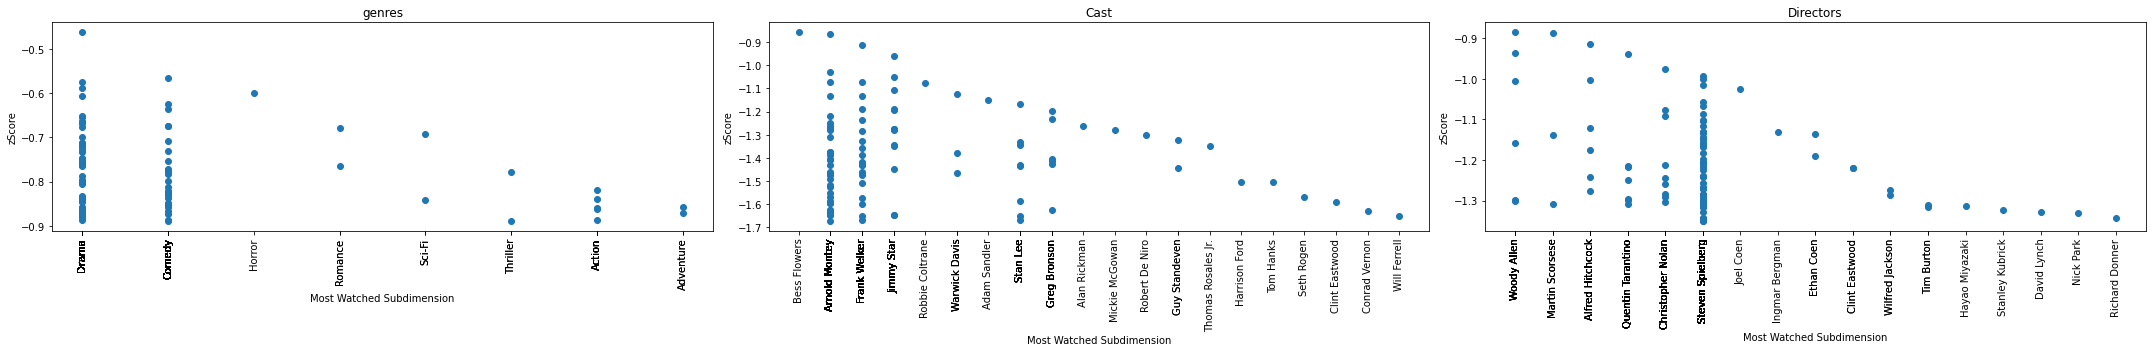

In [57]:
# create subplots for each dimension
fig, axs = plt.subplots(1, 3, figsize=(30,5))

# iterate over each dimension and create a bar plot for the most watched subdimension and its score
for i, dim in enumerate(dimensions):
    # get the most watched subdimension and its score for each user
    data = result_df[dim+'WatchBias'].apply(pd.Series)
    sorted_data = data.sort_values(by=1, ascending=False)[:100]
    most_watched_subdim = sorted_data.apply(pd.Series)[0]
    most_watched_score = sorted_data.apply(pd.Series)[1]
    axs[i].scatter(most_watched_subdim, most_watched_score)

    axs[i].set_title(dim)
    axs[i].set_xlabel('Most Watched Subdimension')
    axs[i].set_ylabel('zScore')
    # axs[i].set_xticklabels(most_watched_subdim, rotation=90)
    axs[i].set_xticks(most_watched_subdim)
    axs[i].set_xticklabels(most_watched_subdim, rotation=90)

  
plt.tight_layout()
plt.show()


##### *Scatter* plot of the most rated subdimension and its score for each user, for each dimension

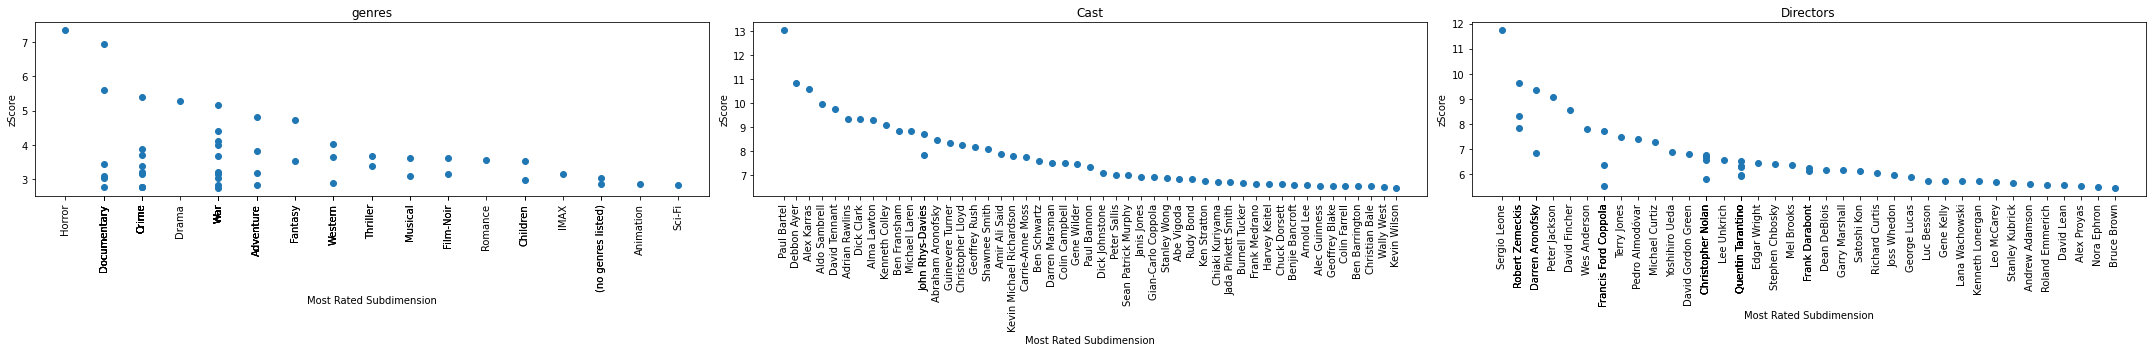

In [59]:
# create subplots for each dimension
fig, axs = plt.subplots(1, 3, figsize=(30,5))

# iterate over each dimension and create a bar plot for the most rated subdimension and its score
for i, dim in enumerate(dimensions):
    # get the most rated subdimension and its score for each user
    data = result_df[dim+'RateBias'].apply(pd.Series)
    sorted_data = data.sort_values(by=1, ascending=False)[:50]
    most_rated_subdim = sorted_data.apply(pd.Series)[0]
    most_rated_score = sorted_data.apply(pd.Series)[1]
    axs[i].scatter(most_rated_subdim, most_rated_score)

    axs[i].set_title(dim)
    axs[i].set_xlabel('Most Rated Subdimension')
    axs[i].set_ylabel('zScore')
    # axs[i].set_xticklabels(most_rated_subdim, rotation=90)
    axs[i].set_xticks(most_rated_subdim)
    axs[i].set_xticklabels(most_rated_subdim, rotation=90)

  
plt.tight_layout()
plt.show()

##### Bar plot for subdimension most number of watched

<ipython-input-189-4fd54a36e22a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(counts.index, rotation=90)
<ipython-input-189-4fd54a36e22a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(counts.index, rotation=90)
<ipython-input-189-4fd54a36e22a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(counts.index, rotation=90)


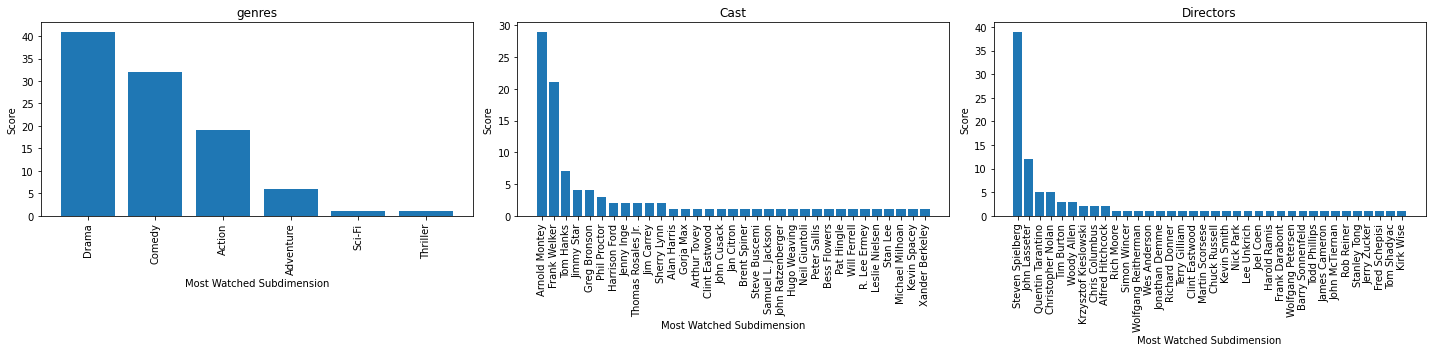

In [189]:
# create subplots for each dimension
fig, axs = plt.subplots(1, 3, figsize=(20,5))

# iterate over each dimension and create a bar plot for the most watched subdimension and its score
for i, dim in enumerate(dimensions):
    # get the most watched subdimension and its score for each user
    data = result_df[dim].apply(pd.Series)
    most_watched_subdim = data[0].apply(pd.Series)[0]
    counts = most_watched_subdim.value_counts()

    # create bar chart
    axs[i].bar(counts.index, counts.values)

    axs[i].set_title(dim)
    axs[i].set_xlabel('Most Watched Subdimension')
    axs[i].set_ylabel('Score')
    # axs[i].set_xticklabels(most_watched_subdim, rotation=90)
    # axs[i].set_xticks(most_watched_subdim)
    axs[i].set_xticklabels(counts.index, rotation=90)

  
plt.tight_layout()
plt.show()

<ipython-input-60-9ccd812fd112>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels([x[0] for x in result_df['genresWatchBias']], rotation=90)
<ipython-input-60-9ccd812fd112>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels([x[0] for x in result_df['genresRateBias']], rotation=90)
<ipython-input-60-9ccd812fd112>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels([x[0] for x in result_df['CastWatchBias']], rotation=90)
<ipython-input-60-9ccd812fd112>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels([x[0] for x in result_df['CastRateBias']], rotation=90)
<ipython-input-60-9ccd812fd112>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabels([x[0] for x in result_df['DirectorsWatchBias']], rotation=90)
<ipython-input

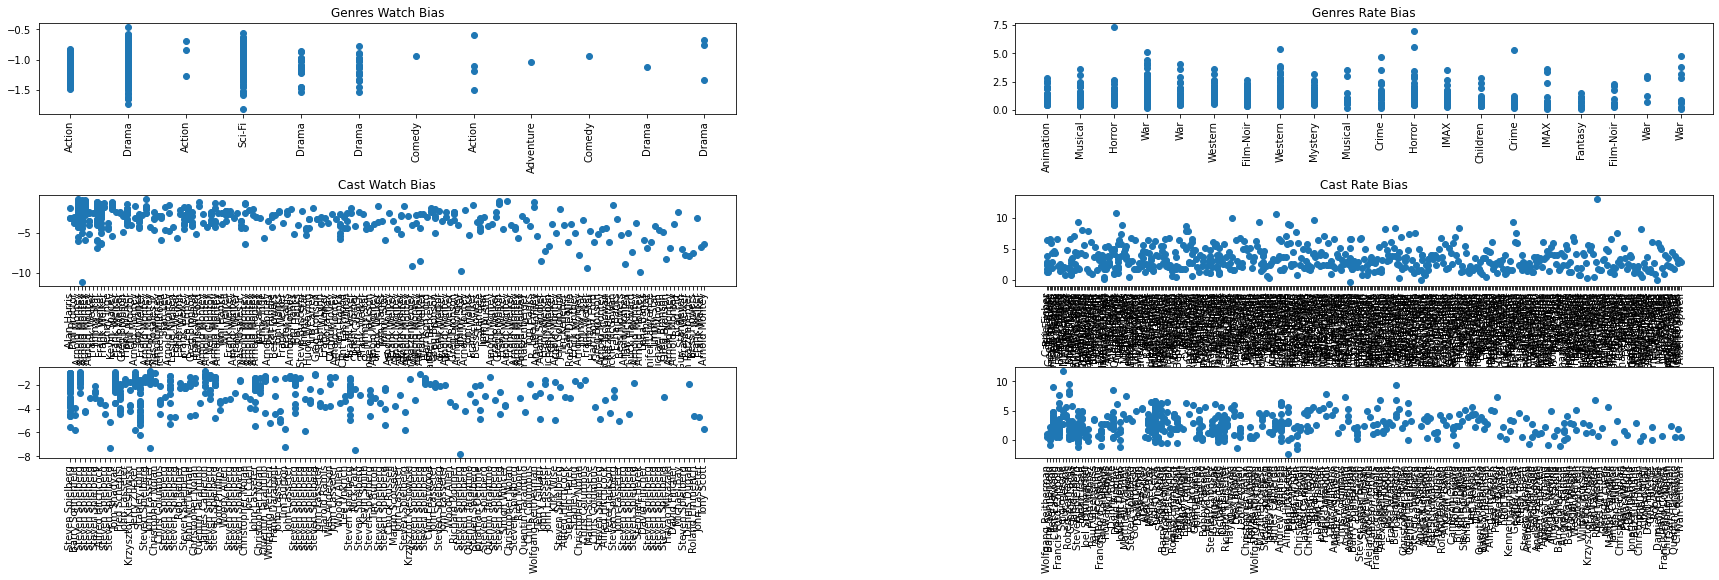

In [60]:
import matplotlib.pyplot as plt

# create subplots
fig, axs = plt.subplots(3, 2, figsize=(30, 8))

# plot genresWatchBias
axs[0, 0].scatter([x[0] for x in result_df['genresWatchBias']], [x[1] for x in result_df['genresWatchBias']])
axs[0, 0].set_title('Genres Watch Bias')
axs[0, 0].set_xticklabels([x[0] for x in result_df['genresWatchBias']], rotation=90)

# plot genresRateBias
axs[0, 1].scatter([x[0] for x in result_df['genresRateBias']], [x[1] for x in result_df['genresRateBias']])
axs[0, 1].set_title('Genres Rate Bias')
axs[0, 1].set_xticklabels([x[0] for x in result_df['genresRateBias']], rotation=90)

# plot CastWatchBias
axs[1, 0].scatter([x[0] for x in result_df['CastWatchBias']][:100], [x[1] for x in result_df['CastWatchBias']][:100])
axs[1, 0].set_title('Cast Watch Bias')
axs[1, 0].set_xticklabels([x[0] for x in result_df['CastWatchBias']][:100], rotation=90)

# plot CastRateBias
axs[1, 1].scatter([x[0] for x in result_df['CastRateBias']][:100], [x[1] for x in result_df['CastRateBias']][:100])
axs[1, 1].set_title('Cast Rate Bias')
axs[1, 1].set_xticklabels([x[0] for x in result_df['CastRateBias']][:100], rotation=90)

# plot DirectorsWatchBias
axs[2, 0].scatter([x[0] for x in result_df['DirectorsWatchBias']][:100], [x[1] for x in result_df['DirectorsWatchBias']][:100])
axs[2, 0].set_title('Directors Watch Bias')
axs[2, 0].set_xticklabels([x[0] for x in result_df['DirectorsWatchBias']][:100], rotation=90)

# plot DirectorsRateBias
axs[2, 1].scatter([x[0] for x in result_df['DirectorsRateBias']][:100], [x[1] for x in result_df['DirectorsRateBias']][:100])
axs[2, 1].set_title('Directors Rate Bias')
axs[2, 1].set_xticklabels([x[0] for x in result_df['DirectorsRateBias']][:100], rotation=90)


# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.9)

# show the plot
plt.show()


##### Scatter plot of the most rated subdimension and its score for each user, for each dimension

### OLD LOGIC

#### Utility functions and feature bias code

In [6]:
# get the whole genre dict for one user
def getGenreRatingDictionaryForUser(userId):
  # get all genre values for one user
  user_data = all_data[all_data['userId'] == userId]
  # separate genres of this user
  genreRatingPerUser = collections.defaultdict(list)
  for idx in user_data.index:
    for genre in user_data['genres'][idx]:
      genreRatingPerUser[genre].append(user_data['rating'][idx])
  return genreRatingPerUser

# find average rating for eacg genre
def getAverageRatingPerGenre(genreRating):
  averageRatingPerGenre = {}
  for genre in genreRating:
    averageRatingPerGenre[genre] = sum(genreRating[genre])/len(genreRating[genre])
  return averageRatingPerGenre

# get size of all movies watched
def getNoOfMoviesWatchedPerUser(userId):
  user_data = all_data[all_data['userId'] == userId]
  return len(user_data)

# get probablity of movie watch per Genre
def getWatchProbabilityPerGenre(genreRating, lenMoviesWatched):
  watchProbabilityPerGenre = {}
  for genre in genreRating:
    watchProbabilityPerGenre[genre] = len(genreRating[genre])/lenMoviesWatched
  return watchProbabilityPerGenre

# get keys with a specific value
def getAllKeysWithValue(dictionary, val):
  return [key for key, value in dictionary.items() if value == val]

In [7]:
def featureBiasGenres(userId):
  # get genre rating dict for user 1
  genreRatingForUser = getGenreRatingDictionaryForUser(userId)
  print(len(genreRatingForUser.keys()), genreRatingForUser.keys())
  # clean up the genres here 
  # remove the least watched genres from the list

  # calculate average genre ratings for user 1
  avgGenreRatingForUser = getAverageRatingPerGenre(genreRatingForUser)
  print(avgGenreRatingForUser)

  movieLengthUser = getNoOfMoviesWatchedPerUser(userId)
  print(movieLengthUser)

  watchProbabilityForUser = getWatchProbabilityPerGenre(genreRatingForUser, movieLengthUser)
  print(watchProbabilityForUser)

  # find highest rated movies
  maxAvgRating = max(avgGenreRatingForUser.values());  
  genresWithMaxAvgRating = getAllKeysWithValue(avgGenreRatingForUser, maxAvgRating)
  print(genresWithMaxAvgRating)

  # find most watched movie
  maxWatchProb = max(watchProbabilityForUser.values());  
  genresWithMaxWatchProb = getAllKeysWithValue(watchProbabilityForUser, maxWatchProb)
  print(genresWithMaxWatchProb)

##### Trial for user 1

In [8]:
featureBiasGenres(1)

17 dict_keys(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror', 'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir'])
{'Adventure': 4.3882352941176475, 'Animation': 4.689655172413793, 'Children': 4.5476190476190474, 'Comedy': 4.27710843373494, 'Fantasy': 4.297872340425532, 'Romance': 4.3076923076923075, 'Action': 4.322222222222222, 'Crime': 4.355555555555555, 'Thriller': 4.1454545454545455, 'Mystery': 4.166666666666667, 'Horror': 3.4705882352941178, 'Drama': 4.529411764705882, 'War': 4.5, 'Western': 4.285714285714286, 'Sci-Fi': 4.225, 'Musical': 4.681818181818182, 'Film-Noir': 5.0}
464
{'Adventure': 0.36637931034482757, 'Animation': 0.125, 'Children': 0.1810344827586207, 'Comedy': 0.3577586206896552, 'Fantasy': 0.2025862068965517, 'Romance': 0.11206896551724138, 'Action': 0.3879310344827586, 'Crime': 0.1939655172413793, 'Thriller': 0.23706896551724138, 'Mystery': 0.07758620689655173, 'Horror': 0.07327586206

User with ID 414 has watched the most movies, with 2698 unique movies watched.


##### Trial for user with most movies watched

In [10]:
featureBiasGenres(414)

20 dict_keys(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Drama', 'War', 'Western', 'Sci-Fi', 'Horror', 'Musical', 'Film-Noir', 'IMAX', 'Documentary', '(no genres listed)'])
{'Adventure': 3.423413566739606, 'Animation': 3.786290322580645, 'Children': 3.4152542372881354, 'Comedy': 3.2710843373493974, 'Fantasy': 3.411504424778761, 'Romance': 3.3762278978388998, 'Action': 3.281437125748503, 'Crime': 3.4759615384615383, 'Thriller': 3.2904, 'Mystery': 3.5733333333333333, 'Drama': 3.5614973262032086, 'War': 3.8306451612903225, 'Western': 3.576923076923077, 'Sci-Fi': 3.4024767801857587, 'Horror': 3.0833333333333335, 'Musical': 3.4545454545454546, 'Film-Noir': 3.857142857142857, 'IMAX': 3.719298245614035, 'Documentary': 3.6774193548387095, '(no genres listed)': 4.25}
2698
{'Adventure': 0.16938472942920682, 'Animation': 0.04595997034840623, 'Children': 0.06560415122312824, 'Comedy': 0.3999258710155671, 'Fantasy': 0.08376575240

In [11]:
# for average rating taking mean rating of that user into consideration
# getting a sorted list of subdimensions with most prob
# pick the users with most watched movie
# pick the top half sub dimensions watched

#### Main code for dimensional bais

In [62]:
# define the dimensions to consider
dimensions = ['genres', 'Cast', 'Directors']

# initialize an empty list to store the result for each user
result_list = []

# iterate over each user in the dataframe
for user in all_data['userId'].unique()[:100]:#all_data['userId'].unique():
    # create a new dictionary to store the results for this user
    user_result = {'userId': user}
    data_current_user = all_data[all_data['userId']==user]
    total_movies_watched_by_user = data_current_user['movieId'].nunique()

    # iterate over each dimension
    for dim in dimensions:
        # explode the dimension column to get the sub-dimensions
        explode_all_data = data_current_user.explode(dim)
        subdims = explode_all_data[dim].apply(lambda x: str(x) if type(x) == list else x)
        
        # count the number of movies watched by this user in each sub-dimension
        subdim_counts = subdims.value_counts()
        # Calculate mean and standard deviation
        mean_dim = subdim_counts.mean()
        std_dim = subdim_counts.std()
        # get the dimension count
        unique_dim_count = subdim_counts.count()
        # normalize the scores using z-score normalization

        # Calculate z-score for each value in subdim_counts
        subdim_scores = ((subdim_counts - mean_dim))/ (std_dim)
        # calculate the score for each sub-dimension as the fraction of movies watched in this sub-dimension
        # subdim_scores = subdim_counts / total_movies_watched_by_user # subdim_counts.sum()
        
        # store the most watched sub-dimension and its score
        most_watched_subdim = subdim_scores.idxmax()
        most_watched_score = subdim_scores.max()
        
        # group the dataframe by sub-dimension and calculate the average rating for each sub-dimension
        # this step is to convert the lists to strings before grouping by the column
        explode_all_data[dim] = explode_all_data[dim].apply(lambda x: str(x))
        subdim_ratings = explode_all_data.groupby(dim)['rating'].mean()
        
        # find the sub-dimension with the highest average rating
        most_rated_subdim = subdim_ratings.idxmax()
        most_rated_score = subdim_ratings.max()
        
        # store the results for this dimension in the user_result dictionary
        user_result[dim] = [(most_watched_subdim, most_watched_score), (most_rated_subdim, most_rated_score)]
    
    # calculate the watch_bias_dimension as the dimension with the highest most_watched_score
    # calculate the rate_bias_dimension as the dimension with the highest most_rated_score
    watch_bias_dimension, rate_bias_dimension = '', ''
    watch_bias_dimension_score, rate_bias_dimension_score = 0, 0
    for dim in dimensions:
      if watch_bias_dimension_score < user_result[dim][0][1]:
        watch_bias_dimension_score = user_result[dim][0][1]
        watch_bias_dimension = dim
      if rate_bias_dimension_score < user_result[dim][1][1]:
        rate_bias_dimension_score = user_result[dim][1][1]
        rate_bias_dimension = dim
    
    # add the watch_bias_dimension and rate_bias_dimension to the user_result dictionary
    user_result['watch_bias_dimension'] = (watch_bias_dimension, watch_bias_dimension_score)
    user_result['rate_bias_dimension'] = (rate_bias_dimension, rate_bias_dimension_score)
    
    # append the user_result dictionary to the result_list
    result_list.append(user_result)

print("done")
# create a dataframe from the result_list
result_df = pd.DataFrame(result_list)
result_df

done


,userId,genres,Cast,Directors,watch_bias_dimension,rate_bias_dimension
0,1,"[(Action, 1.7868461458492084), (Film-Noir, 5.0)]","[(Alan Harris, 14.639183449304689), ('Little B...","[(Steven Spielberg, 6.225185012419581), (Alan ...","(Cast, 14.639183449304689)","(genres, 5.0)"
1,5,"[(Drama, 2.861927837754125), (Musical, 4.4)]","[(Phil Proctor, 11.649203996129998), (Adam Sie...","[(Barry Sonnenfeld, 3.5732138395087896), (Ben ...","(Cast, 11.649203996129998)","(Cast, 5.0)"
2,7,"[(Action, 1.8580214159596873), (Horror, 4.0)]","[(Arnold Montey, 19.10697139065316), ('Weird A...","[(Steven Spielberg, 4.2115894074762705), (Akir...","(Cast, 19.10697139065316)","(Cast, 5.0)"
3,15,"[(Sci-Fi, 1.6219696696528803), (War, 4.1)]","[(Arnold Montey, 23.435949855165607), (A'da Al...","[(Steven Spielberg, 5.657045441312942), (Aleja...","(Cast, 23.435949855165607)","(Cast, 5.0)"
4,17,"[(Drama, 2.4216444210758232), (War, 4.44444444...","[(Arnold Montey, 20.09310266079454), (Aaron Iz...","[(Steven Spielberg, 3.7367904671375367), (Geor...","(Cast, 20.09310266079454)","(Cast, 5.0)"
...,...,...,...,...,...,...
95,269,"[(Thriller, 2.1185125060039742), (Horror, 5.0)]","[(Xander Berkeley, 11.86656060587545), (Adrian...","[(nan, nan), (Andrew Fleming, 5.0)]","(Cast, 11.86656060587545)","(genres, 5.0)"
96,270,"[(Comedy, 1.6790154393038144), (Animation, 5.0)]","[(Greg Bronson, 10.869180833607771), (Adam Fit...","[(nan, nan), (Henry Selick, 5.0)]","(Cast, 10.869180833607771)","(genres, 5.0)"
97,273,"[(Comedy, 3.0174626573558583), (Mystery, 5.0)]","[(Phil Proctor, 11.958629210859002), (Aaron Ne...","[(Kirk Wise, 2.1646933814971194), (Christopher...","(Cast, 11.958629210859002)","(genres, 5.0)"
98,274,"[(Comedy, 2.0976094893186388), (Film-Noir, 3.9...","[(Frank Welker, 34.120153493337), (Adam Cole, ...","[(Steven Spielberg, 8.811690649786796), (Mary ...","(Cast, 34.120153493337)","(Cast, 5.0)"


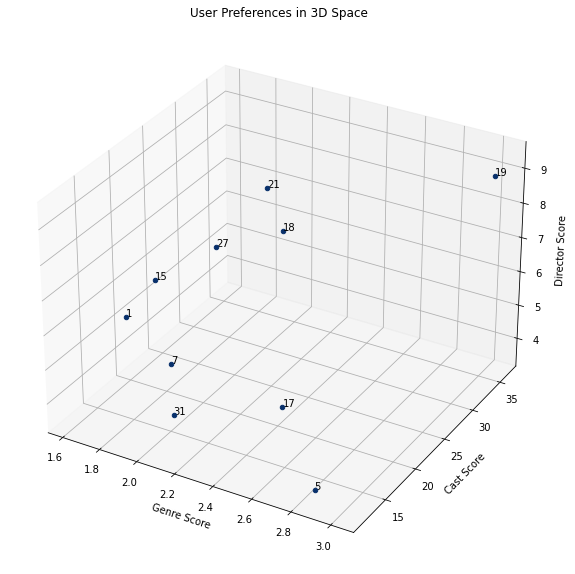

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create a 3D scatter plot for genres, cast, and directors
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# loop over each row in the result dataframe
for index, row in result_df[:10].iterrows():
    genre_score = row['genres'][0][1]
    cast_score = row['Cast'][0][1]
    director_score = row['Directors'][0][1]
    watch_bias_score = row['watch_bias_dimension'][1]
    rate_bias_score = row['rate_bias_dimension'][1]

    # plot the point
    if row['watch_bias_dimension'][0] == 'genres':
        ax.scatter(genre_score, cast_score, director_score, color=plt.cm.Reds(watch_bias_score), marker='o')
    elif row['watch_bias_dimension'][0] == 'Cast':
        ax.scatter(genre_score, cast_score, director_score, color=plt.cm.Blues(watch_bias_score), marker='o')
    else:
        ax.scatter(genre_score, cast_score, director_score, color=plt.cm.Greens(watch_bias_score), marker='o')
    
    # annotate the point with the user ID
    ax.text(genre_score, cast_score, director_score, row['userId'], color='black')
    
# set the labels and title
ax.set_xlabel('Genre Score')
ax.set_ylabel('Cast Score')
ax.set_zlabel('Director Score')
ax.set_title('User Preferences in 3D Space')
plt.show()
